In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [29]:
def generate_data():
    data_x=[]
    data_y=[]
    for i in range(100):
        x=random.uniform(-10,10)
        data_x.append(x)
        data_y.append(2*x+1-random.uniform(-1,1))
    return data_x,data_y

In [30]:
def calLeastSquareMethod(dataIn, labels):
    length = len(dataIn)  # 数据个数
    print(length)
    sumX = 0.0
    sumXX = 0.0
    for data in dataIn:
        sumX += data
        sumXX += data * data
    avgX = sumX / length
    s = 0.0
    for i in range(length-1):
        print(labels[i])
        s += labels[i] * (dataIn[i] - avgX)
    weight = s / (sumXX - sumX * sumX / length)
    s2 = 0.0
    for j in range(length-1):
        s2 +=labels[j] - weight * dataIn[j]
    b = s2 / length
    return weight, b

[0.9410099613581611, -2.448390253198635, 12.434051728417787, 3.9857064677950547, 18.629346094005136, -11.70564120644519, 7.06892513373778, -14.060599893315226, 4.423206718446927, 4.614523564852005, -9.646706988696401, 2.38755508741471, -0.5228737912168839, -1.0959144876710794, 12.617749058147357, -8.488811700998882, -12.12018200513059, -3.313717999040252, 17.129059388484755, 14.072600637563484, 12.841865276485695, 12.773714198074899, -5.421234885076529, 1.0191309649350315, -8.337902501922173, 2.345164514033721, 16.313899268558266, 12.223505186678956, 1.5961650192393169, 13.06884660316412, 3.293960536381105, 10.565359466364127, 6.865658859168867, -10.51327130503066, -12.252406943513224, 7.805404318647919, -4.752536782092024, -14.574830277687623, 9.19426096399483, 21.88713786891793, 14.723958383718593, -5.611991059287, 4.880866807960097, -12.177313988013063, 8.140448355605924, 13.859750701072224, -0.09813695471846362, -5.164659304626894, -2.339761583551697, -13.541783682909587, -18.51953

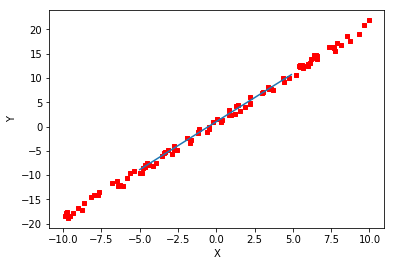

In [35]:
def plotBestFit2(weight, b):
    print(weight, b)
    #dataArr=np.array(dataMatrix) #矩阵转换为数组
    n = len(dataArr)
    xcord1 = []
    ycord1 = []
    for i in range(n):
        xcord1.append(dataArr[i])
        ycord1.append(labelArr[i])
    fig = plt.figure()
    # 在子图中画出样本点
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=10, c='red', marker='s')

    # 画出拟合直线
    x = np.arange(-5.0, 5.0, 0.1)
    y = weight * x + b

    ax.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


dataArr, labelArr = generate_data()
print(labelArr)
weight, b = calLeastSquareMethod(dataArr, labelArr)
plotBestFit2(weight, b)


| Epoch[ 1 / 200 ], loss: 10.138321
| Epoch[ 101 / 200 ], loss: 0.231881


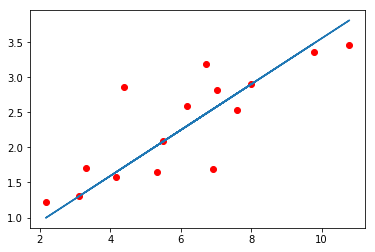

In [37]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.86], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

class SingleLinearRegression(nn.Module):
    def __init__(self):
        super(SingleLinearRegression, self).__init__()
        self.regression = nn.Linear(1, 1)

    def forward(self, x):
        out = self.regression(x)

        return out

model = SingleLinearRegression()

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

epoch = 200
for i in range(epoch):
    x_train = Variable(x_train)
    y_train = Variable(y_train)

    ## 6. 获取模型的输出值
    out = model(x_train)

    ## 7. 得到损失函数值
    loss = criterion(y_train, out)

    ## 8. 清空参数的所有梯度
    optimizer.zero_grad()

    ## 9. 计算梯度值
    loss.backward()

    ## 10. 跟新参数
    optimizer.step()

    if i % 100 == 0:
        print('| Epoch[ {} / {} ], loss: {:.6f}'
              .format(i + 1, epoch, loss.item()))
x_train = Variable(x_train)
model.eval()
predict = model(x_train)
predict = predict.data.numpy()
plt.scatter(x_train.data.numpy(), y_train.numpy(), c = 'red')
plt.plot(x_train.data.numpy(), predict, label='Fitting Line')
plt.show()
